In [12]:
#from SSIM_PIL import compare_ssim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd


import skimage
from skimage.io import imread
from sklearn.metrics import mean_squared_error
import os

iteration=20

In [13]:
def get_Noise(img,d): #getting salt and paper noise
    #return skimage.util.random_noise(img, mode='s&p', amount=d)
    paper=d
    salt=1-d
    row, col=img.shape
    g=np.matrix(img).reshape(row, col)
    for i in range(row):
        for j in range(col):
            ran=np.random.random()
            if ran<paper:
                g[i,j]=0
            elif ran>salt:
                g[i,j]=255
            else:
                g[i,j]=img[i,j]
    return g

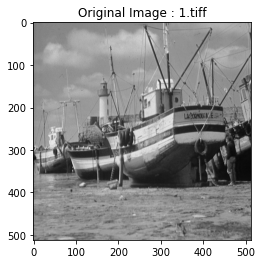

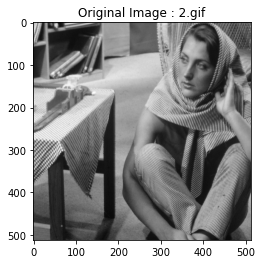

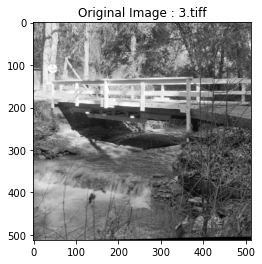

In [14]:
path='C://Users//Biswarup Mistry//Desktop//Misc//'  #defining the image directory path
dir_list = os.listdir(path)
for item in dir_list :
    k=str(path+str(item))
    img = imread(k)
    
    plt.title('Original Image : '+item)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.show()


In [15]:
def PSNRVsNoiseDensity():   #getting corresponding mse(s) for given noise density 'd'
    r=255.0
    dataframe = pd.DataFrame()    
    for item in dir_list :
        k=str(path+str(item))
        img = imread(k)
        x=[]
        y=[]
        df=np.array([])
        i=iteration
        d=0.0
        while(i>0 and d<=1.0):
            noise_img=get_Noise(img,d) #getting noisy image
            mse=np.square(np.subtract(img,noise_img)).mean() #calculating MSE of Original image and Image with Noise
            psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image
            x.append(d)
            y.append(psnr)
            df=np.append(df,psnr)
            d=d+0.05
            i=i-1
        dataframe[item] = df
        
    dataframe.to_csv('PSNRvsNoiseDensity.csv', index=False) #creating the PSNR valu csv file



In [16]:
PSNRVsNoiseDensity() #creating the Mse(s) csv file

C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_1792\254289465.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image
C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_1792\254289465.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image
C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_1792\254289465.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image


In [17]:
data=pd.read_csv('PSNRvsNoiseDensity.csv')
data
#print(df.loc[[1]]) #for row wise view

,1.tiff,2.gif,3.tiff
0,inf,inf,inf
1,37.844675,37.737531,37.419406
2,34.797301,34.731918,34.440894
3,33.002251,32.959748,32.673918
4,31.791603,31.735983,31.446286
5,30.810558,30.789816,30.440396
6,30.022379,29.978062,29.667662
7,29.350528,29.317024,28.995817
8,28.767400,28.731964,28.402507
9,28.258976,28.216643,27.893077


In [18]:
df=pd.DataFrame(data)
def combined(dir_list,iteration): #for combined graph ploting of MSE(s) vs Noise Density
    x=[]
    d=0.0
    while iteration>0:
        x.append(d)
        d=d+0.05 
        iteration=iteration-1
    plt.title('MSE(s) vs Density')
    plt.xlabel('density')
    plt.ylabel('MSE(s)') 
    for item in dir_list:
        plt.scatter(x,df[item],marker='o')
        plt.plot(x,df[item])
    plt.axvline(0.5, color='k', linestyle='--') #defining the Thresold line at density 0.5
    plt.show()

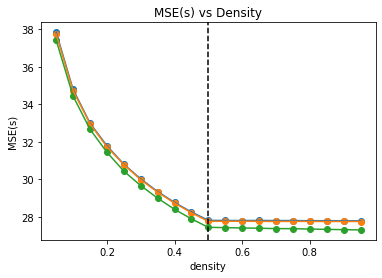

In [19]:
combined(dir_list,iteration) 

In [20]:
x=np.array([])
x=np.append(x,df['1.tiff'])
print('x : ',x,'\n')
print('np.sum(x) : ',np.sum(x) )

x :  [        inf 37.84467525 34.79730055 33.00225069 31.79160323 30.81055834
 30.02237918 29.35052776 28.76739966 28.25897617 27.8137658  27.80760189
 27.80424398 27.80941728 27.8014593  27.80531289 27.79240987 27.7969804
 27.78891056 27.78907012] 

np.sum(x) :  inf
